In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('cardio_train.csv',delimiter = ';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [32]:
print(f"shape: {df.shape}")
print(f"Cols :{df.columns}")
print(f"type: {df['cardio'].dtype}")


shape: (70000, 13)
Cols :Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')
type: int64


In [33]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
category_col = df.select_dtypes(include=['object'])
category_col.columns.tolist()

[]

In [35]:
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
numerical_cols.columns.tolist()

['id',
 'age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active',
 'cardio']

In [36]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [37]:
#duplicate
df.duplicated().sum()

0

<Axes: >

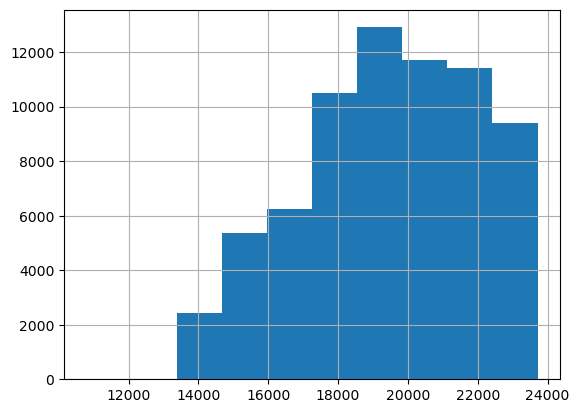

In [38]:
df['age'].hist(bins = 10)

<Axes: >

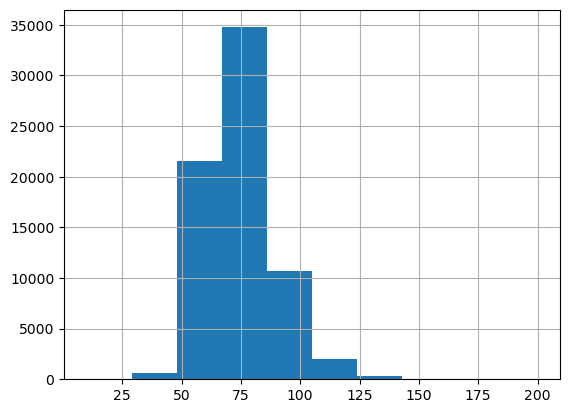

In [39]:
df['weight'].hist(bins = 10)

<Axes: xlabel='weight'>

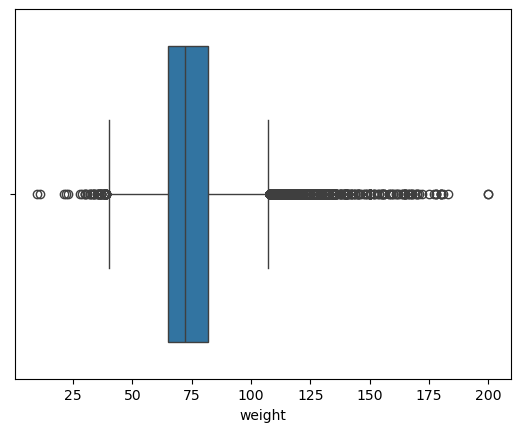

In [40]:
sns.boxplot(x = df['weight'])

In [41]:
df['smoke'].value_counts()

smoke
0    63831
1     6169
Name: count, dtype: int64

In [42]:
df['cholesterol'].value_counts()

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

<Axes: xlabel='cholesterol'>

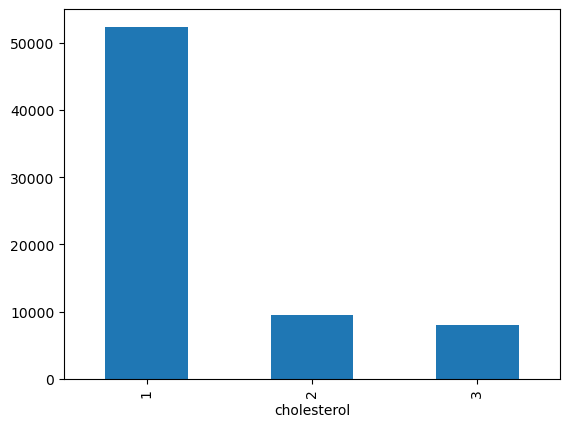

In [43]:
df['cholesterol'].value_counts().plot(kind='bar')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


### corr 

In [45]:
df.corr()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


### graph of corr

<Axes: >

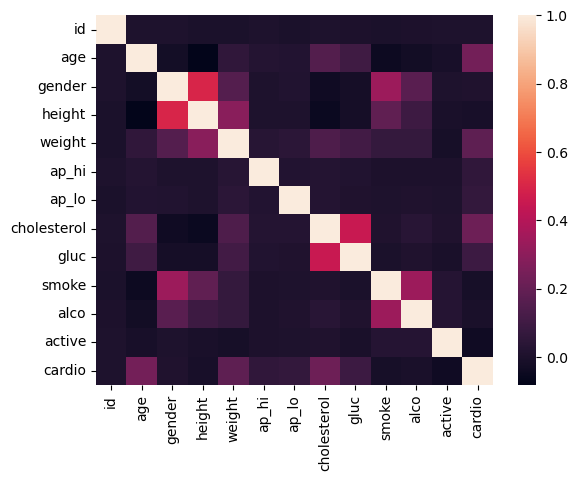

In [46]:
sns.heatmap(df.corr())

In [47]:
df['age_years'] = df['age'] // 365

In [48]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,52
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,61
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,52
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,61


### Most common ages (top 10)

In [49]:
df['age_years'].value_counts().head(10)

age_years
55    3927
53    3868
57    3686
56    3607
54    3605
59    3576
49    3417
58    3409
51    3368
52    3279
Name: count, dtype: int64

###  Average height and weight

In [50]:
print(df['height'].mean())
print(df['weight'].mean())


164.35922857142856
74.20569


In [51]:
df['BMI'] = df['weight']/(df['height']/100)**2
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177


### BMI distribution

<Axes: xlabel='BMI', ylabel='Count'>

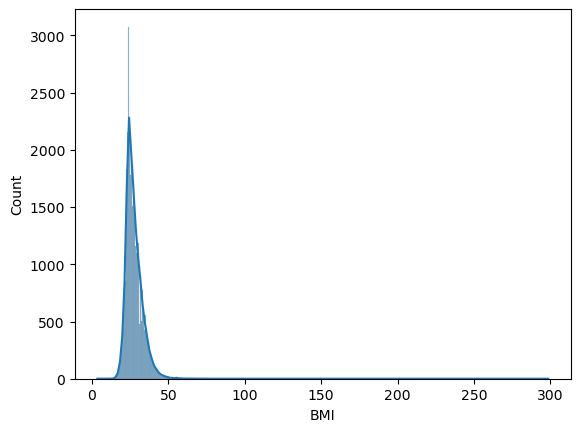

In [52]:
sns.histplot(df['BMI'],kde=True)

### Systolic blood pressure > 250

In [53]:
len(df[df['ap_hi']>250])

40

### Diastolic blood pressure>150 and <40

In [54]:
len(df[(df['ap_lo']>150) | (df['ap_lo']<40)])

1034

### Gender distribution

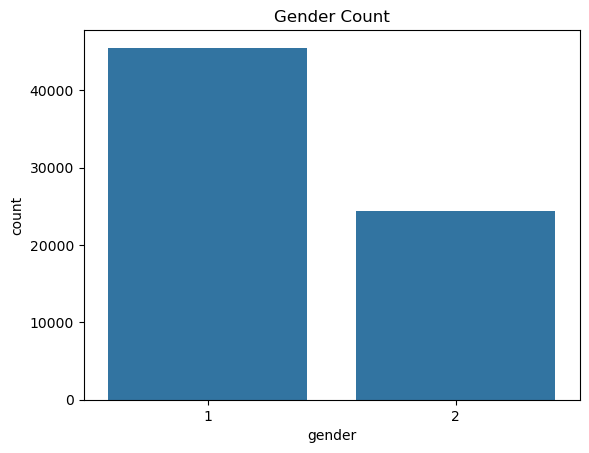

In [55]:
sns.countplot(x='gender',data=df)
plt.title("Gender Count")
plt.show()

<Axes: xlabel='BMI', ylabel='Count'>

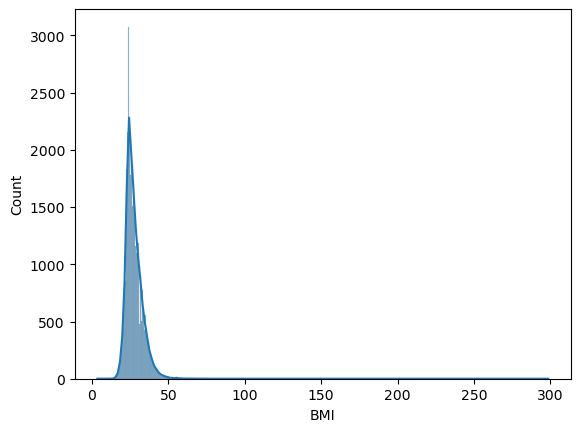

In [56]:
sns.histplot(df['BMI'],kde=True)

### outlier detection

<Axes: xlabel='height'>

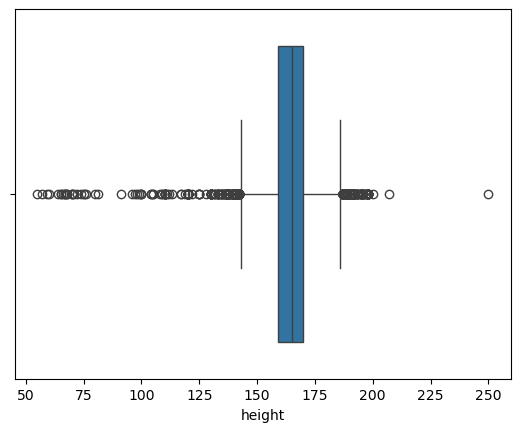

In [57]:
sns.boxplot(x = df['height'])

<Axes: xlabel='ap_lo'>

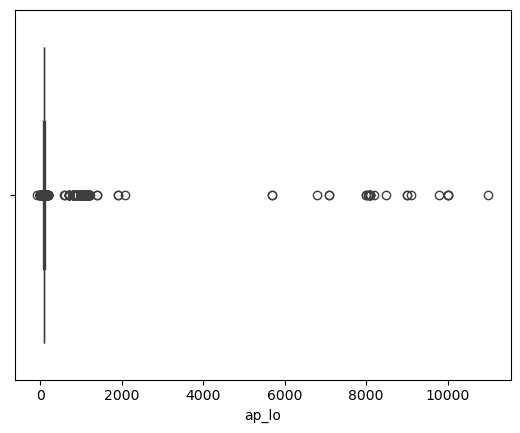

In [58]:
sns.boxplot(x = df['ap_lo'])

### Remove Outliers

<Axes: >

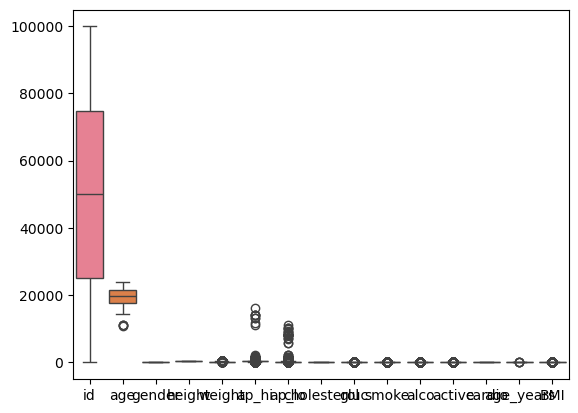

In [59]:
## height
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-IQR*1.5
upper = Q3+IQR*1.5
height_removed_outlier = df[(df['height']>=lower) & (df['height']<upper)]
df=height_removed_outlier
sns.boxplot(height_removed_outlier)

In [60]:
df['height']

0        168
1        156
2        165
3        169
4        156
        ... 
69995    168
69996    158
69997    183
69998    163
69999    170
Name: height, Length: 69481, dtype: int64

<Axes: >

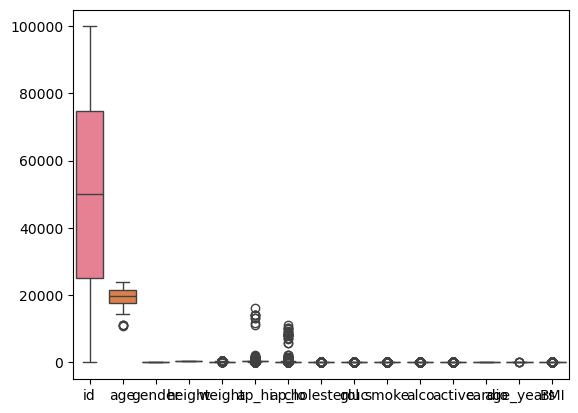

In [61]:
## weight
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-IQR*1.5
upper = Q3+IQR*1.5
weight_removed_outlier = df[(df['weight']>=lower) & (df['weight']<upper)]
weight_removed_outlier
sns.boxplot(weight_removed_outlier)

In [62]:
df = weight_removed_outlier

<Axes: >

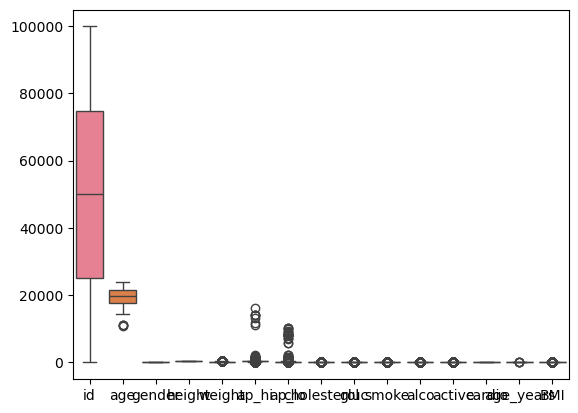

In [63]:
## BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-IQR*1.5
upper = Q3+IQR*1.5
BMI_removed_outlier = df[(df['BMI']>=lower) & (df['BMI']<upper)]
df = BMI_removed_outlier
sns.boxplot(BMI_removed_outlier)

In [64]:
# def removeOutliers(df,col):
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3-Q1
#     lower = Q1-IQR*1.5
#     upper = Q1+IQR*1.5
#     removed_outlier = df[(df[col]>=lower) & (df[col]<upper)]
#     df = removed_outlier
#     return df


In [65]:
# df = removeOutliers(df,col = 'ap_hi')
# df

In [66]:
## ap_hi
Q1 = df['ap_hi'].quantile(0.25)
Q3 = df['ap_hi'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-IQR*1.5
upper = Q3+IQR*1.5
ap_hi_removed_outlier = df[(df['ap_hi']>=lower) & (df['ap_hi']<upper)]
df = ap_hi_removed_outlier


In [67]:
Q1 = df['ap_lo'].quantile(0.25)
Q3 = df['ap_lo'].quantile(0.75)
IQR = Q3-Q1
lower = Q1-IQR*1.5
upper = Q3+IQR*1.5
ap_lo_removed_outlier = df[(df['ap_lo']>=lower) & (df['ap_lo']<upper)]
df = ap_lo_removed_outlier

In [68]:
df[['height','weight','ap_hi','ap_lo','BMI']].describe()

,height,weight,ap_hi,ap_lo,BMI
count,60880.000000,60880.000000,60880.000000,60880.000000,60880.000000
mean,164.568233,72.669308,125.934166,81.538617,26.853240
std,7.474713,11.836230,13.766173,7.570866,4.199884
min,143.000000,40.000000,90.000000,65.000000,15.035584
25%,159.000000,65.000000,120.000000,80.000000,23.828125
50%,165.000000,71.000000,120.000000,80.000000,26.122449
75%,170.000000,80.000000,139.250000,90.000000,29.585799
max,186.000000,107.000000,169.000000,104.000000,38.625904


In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [70]:
df = df.drop(['weight','height'], axis=1)


In [71]:
df[['ap_hi','ap_lo']].corr()


,ap_hi,ap_lo
ap_hi,1.000000,0.703919
ap_lo,0.703919,1.000000


In [72]:
df['bp_diff'] = df['ap_hi'] - df['ap_lo']


In [89]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

features = [
    'age', 'gender', 'ap_hi', 'ap_lo',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_diff'
]

X = df[features]
y = df['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

# Train
pipeline.fit(X_train, y_train)

# Save pipeline
pickle.dump(pipeline, open("cardio_pipeline.pkl", "wb"))

print("Model trained")
print("Pipeline expects:", pipeline.n_features_in_)

Model trained
Pipeline expects: 10


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

X = df[features]
y = df['cardio']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', probability=True))
])

pipeline.fit(X_train, y_train)

In [74]:
y = df['cardio']
X = df.drop('cardio', axis=1)


In [75]:
df.columns


Index(['id', 'age', 'gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke',
       'alco', 'active', 'cardio', 'age_years', 'BMI', 'bp_diff'],
      dtype='object')

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model

LogisticRegression()

In [78]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7224047306176085


<Axes: >

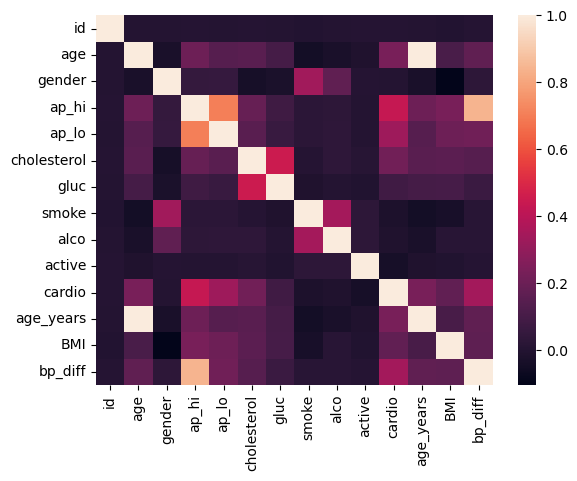

In [80]:
sns.heatmap(df.corr())

In [81]:
df

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI,bp_diff
0,0,18393,2,110,80,1,1,0,0,1,0,50,21.967120,30
1,1,20228,1,140,90,3,1,0,0,1,1,55,34.927679,50
2,2,18857,1,130,70,3,1,0,0,0,1,51,23.507805,60
3,3,17623,2,150,100,1,1,0,0,1,1,48,28.710479,50
5,8,21914,1,120,80,2,2,0,0,0,0,60,29.384676,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,130,90,1,1,0,0,1,1,53,23.661439,40
69994,99992,21074,1,150,80,1,1,0,0,1,1,57,29.384757,70
69995,99993,19240,2,120,80,1,1,1,0,1,0,52,26.927438,40
69998,99998,22431,1,135,80,1,2,0,0,0,1,61,27.099251,55


In [82]:

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
import matplotlib.pyplot as plt



In [83]:
# Predictions
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


In [84]:
accuracy

0.7224047306176085

In [85]:
precision

0.7472485035721181

In [86]:
recall

0.6514054872917018

In [87]:
f1

0.6960431654676259

In [88]:
roc_auc

0.7826193333618594